# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-12 13:26:35.743109: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 13:26:35.745653: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 13:26:35.776610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 13:26:36.468722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 5.767%
Epoch 2/5: accuracy 8.767%
Epoch 3/5: accuracy 10.383%
Epoch 4/5: accuracy 10.383%
Epoch 5/5: accuracy 10.383%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[ 0  1  1 ...  0  1  0]
 [ 1  0  0 ...  1 -2  1]] ...

 [[2 2 2 ... 2 2 2]
 [1 1 1 ... 1 0 0]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]

 [[ 1  1 -1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1
   1  1  1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
   1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1
  -1 -1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1
  -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
   1 -1 -1 -1  1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1]] ...



 [ 0  0  0 33 75 65 67  0  0  0  0 32 56 68  0 71  0 69 76  0 70 62 61  0
 65  0 77 68  0  0 34 64 63 80  0 76 32 69 71  0 74  0  0 36 71 59 75 75
  0  0 72 70  0 68 73  0 31 67  0 74 75 72  0 64  0  0 71  0  0 69 71  0
 80  0  0  0  0 31 62 84  0 62  0 54 74 62  0 65 64 75  0 79 76  0 64  0
  0  0 71 60 69 60  0  0  0  0 79 62 74  0 69  0  0  0  0 32 74 26 71  0
 35  0  0  0 34  0 67  0]


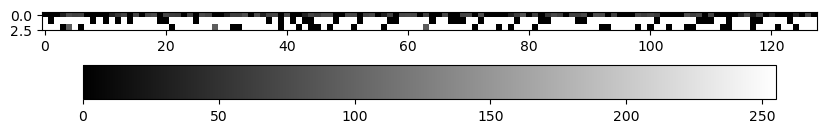


 [  1   0   0   0 255 255   0   0 255 255]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)